In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import sys,os
import string
import random
owd = os.getcwd()
os.listdir()

['keras.ipynb',
 'vgg16.ipynb',
 'xGBoost.ipynb',
 'Actuarots_knn.ipynb',
 'readme.md',
 'CNN (colab).ipynb',
 '.ipynb_checkpoints',
 'MHEALTHDATASET',
 'Random Forest.ipynb',
 'NN.ipynb',
 '.git']

# Defining Utility Functions

In [2]:
#utility function
def getSubjectNum(fileName) :
    import re
    n = re.findall(r'\d+', fileName)
    return int(n[0])

In [140]:
"""
input_filename -- The name of the input file
rps -- The number of Readings Per Second (that you want to appear in a single image)
figsize -- Figure size (in inches)
activities -- a list of numbers that represents the activities you want to consider
 
1- the function considers all the activities by default
2- it accepts multiple input files

"""
# rps : readingsPerSample
def getXY(input_filenames=["mHealth_subject3.log"],rps=50,activities = range(1,13),column=10):
    os.chdir(owd)
    os.chdir("MHEALTHDATASET/")
    counter = 0
    X =  np.array([])
    Y =  np.array([])
    
    for input_filename in input_filenames:
        counter = 0
        df = pd.read_csv(input_filename, header=None, delim_whitespace=True)
#         df = df[df[23]!=0] #drop 0 labeled features

        readings_df = pd.DataFrame(df[column].copy())
        targets_df = pd.DataFrame(df[23].copy())
        reading_np = readings_df.values
        # #         segmentation
        for i in range(int(readings_df.shape[0]/rps)):
            if  float(targets_df[i*rps:i*rps+rps].mean()) in activities:
                Y=np.append(Y,targets_df[i*rps:i*rps+rps].mean()) #new
                X=np.append(X,readings_df[i*rps:i*rps+rps].values)
        
    X=X.reshape(-1,rps)
    os.chdir(owd)
    return X,Y


# Defining initial KNN model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  


In [138]:
X,y = getXY(column=10,rps=50,activities=range(1,13),input_filenames=["mHealth_subject3.log"])
# X,y = getXY(column=10,rps=50,activities=range(1,13),input_filenames=["mHealth_subject1.log","mHealth_subject3.log","mHealth_subject2.log","mHealth_subject4.log","mHealth_subject5.log","mHealth_subject6.log","mHealth_subject7.log","mHealth_subject8.log","mHealth_subject9.log","mHealth_subject10.log"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [139]:
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.9132629979132169

# Finding Best Predictor (Column) in the dataset

In [100]:
scores=[]
results={"mHealth_subject1.log":(0,0),"mHealth_subject2.log":(0,0),"mHealth_subject3.log":(0,0),"mHealth_subject4.log":(0,0),"mHealth_subject5.log":(0,0),"mHealth_subject6.log":(0,0),"mHealth_subject7.log":(0,0),"mHealth_subject8.log":(0,0),"mHealth_subject9.log":(0,0),"mHealth_subject10.log":(0,0)}
# best_score=-1
labels = ["acceleration chest (X) ","acceleration chest (Y) ","acceleration chest (Z)","electrocardiogram signal (lead 1)","electrocardiogram signal (lead 2)","acceleration left-ankle (X) ","acceleration left-ankle (Y) ","acceleration left-ankle (Z) ","gyro left-ankle (X) ","gyro left-ankle (Y) ","gyro left-ankle (Z) ","magnetometer left-ankle (X) ","magnetometer left-ankle (Y) ","magnetometer left-ankle (Z) ","acceleration right-lower-arm (X) ","acceleration right-lower-arm (Y) ","acceleration right-lower-arm (Z) ","gyro right-lower-arm (X) ","gyro right-lower-arm (Y) ","gyro right-lower-arm (Z) ","magnetometer right-lower-arm (X) ","magnetometer right-lower-arm (Y) ","magnetometer right-lower-arm (Z) ","Label"]
files = ["mHealth_subject1.log","mHealth_subject2.log","mHealth_subject3.log","mHealth_subject4.log","mHealth_subject5.log","mHealth_subject6.log","mHealth_subject7.log","mHealth_subject8.log","mHealth_subject9.log","mHealth_subject10.log"]
for c in range(23):
    print('%.2f'%((100*(c+1))/24))
    for file_name in files:
        print(file_name)
        X,y = getXY(column=c,rps=50,activities=range(1,12),input_filenames=[file_name])
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=7)
        knn = KNeighborsClassifier(n_neighbors=1)
        score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        if score.mean() > results[file_name][1]:
            results[file_name]=(c,score.mean())
#         scores+=[score.mean()]


4.17
mHealth_subject1.log
mHealth_subject2.log
mHealth_subject3.log
mHealth_subject4.log
mHealth_subject5.log
mHealth_subject6.log
mHealth_subject7.log
mHealth_subject8.log
mHealth_subject9.log
mHealth_subject10.log
8.33
mHealth_subject1.log
mHealth_subject2.log
mHealth_subject3.log
mHealth_subject4.log
mHealth_subject5.log
mHealth_subject6.log
mHealth_subject7.log
mHealth_subject8.log
mHealth_subject9.log
mHealth_subject10.log
12.50
mHealth_subject1.log
mHealth_subject2.log
mHealth_subject3.log
mHealth_subject4.log
mHealth_subject5.log
mHealth_subject6.log
mHealth_subject7.log
mHealth_subject8.log
mHealth_subject9.log
mHealth_subject10.log
16.67
mHealth_subject1.log
mHealth_subject2.log
mHealth_subject3.log
mHealth_subject4.log
mHealth_subject5.log
mHealth_subject6.log
mHealth_subject7.log
mHealth_subject8.log
mHealth_subject9.log
mHealth_subject10.log
20.83
mHealth_subject1.log
mHealth_subject2.log
mHealth_subject3.log
mHealth_subject4.log
mHealth_subject5.log
mHealth_subject6.log
mH

In [109]:
for r  in results:
    print("%25s , %25s , %.2f"%(r,labels[results[r][0]],results[r][1]))

     mHealth_subject1.log ,      gyro left-ankle (X)  , 0.94
     mHealth_subject2.log ,      gyro left-ankle (Z)  , 0.84
     mHealth_subject3.log ,    acceleration chest (Z) , 0.92
     mHealth_subject4.log ,    acceleration chest (Z) , 0.91
     mHealth_subject5.log ,      gyro left-ankle (Z)  , 0.94
     mHealth_subject6.log ,      gyro left-ankle (Y)  , 0.91
     mHealth_subject7.log ,      gyro left-ankle (X)  , 0.95
     mHealth_subject8.log ,      gyro left-ankle (Z)  , 0.97
     mHealth_subject9.log ,      gyro left-ankle (Y)  , 0.96
    mHealth_subject10.log ,      gyro left-ankle (Z)  , 0.93


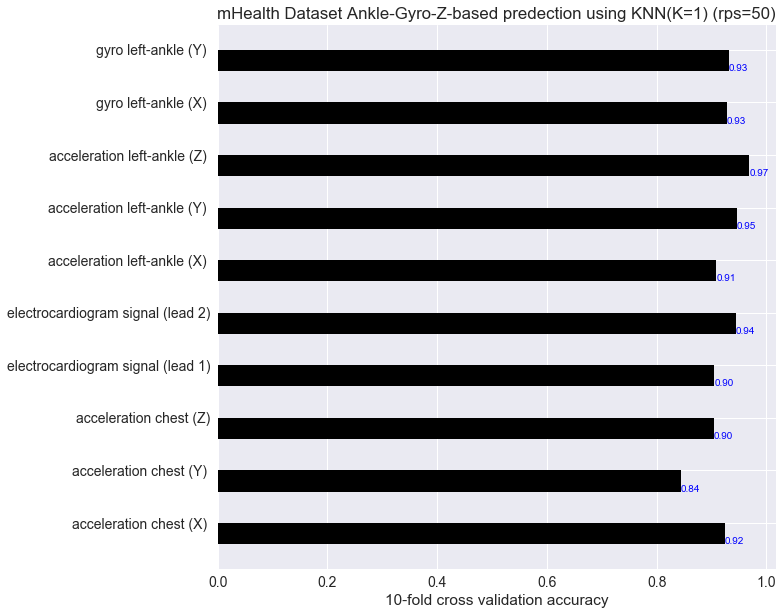

In [122]:
labels = ["acceleration chest (X) ","acceleration chest (Y) ","acceleration chest (Z)","electrocardiogram signal (lead 1)","electrocardiogram signal (lead 2)","acceleration left-ankle (X) ","acceleration left-ankle (Y) ","acceleration left-ankle (Z) ","gyro left-ankle (X) ","gyro left-ankle (Y) ","gyro left-ankle (Z) ","magnetometer left-ankle (X) ","magnetometer left-ankle (Y) ","magnetometer left-ankle (Z) ","acceleration right-lower-arm (X) ","acceleration right-lower-arm (Y) ","acceleration right-lower-arm (Z) ","gyro right-lower-arm (X) ","gyro right-lower-arm (Y) ","gyro right-lower-arm (Z) ","magnetometer right-lower-arm (X) ","magnetometer right-lower-arm (Y) ","magnetometer right-lower-arm (Z) ","Label"]
x = labels
y = scores

# fig, ax = plt.subplots()  
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
width = 2 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ind = 5*ind
ax.barh(ind, y, width, color="black")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x)
plt.title('mHealth Dataset Ankle-Gyro-Z-based predection using KNN(K=1) (rps=50)')
plt.xlabel('10-fold cross validation accuracy')
for i, v in enumerate(y):
    ax.text(v, i*5-1, "%.2f"%(v), color='blue', fontsize=10)
#plt.show()

#### Turned out that the Gyroscope-X that is attached to the ankle is the best predector

# Testing the model

0.9276508605792493
Training time :  -1.8835067749023438e-05 
Prediction Time (per sample): 3.6731898355827056e-05


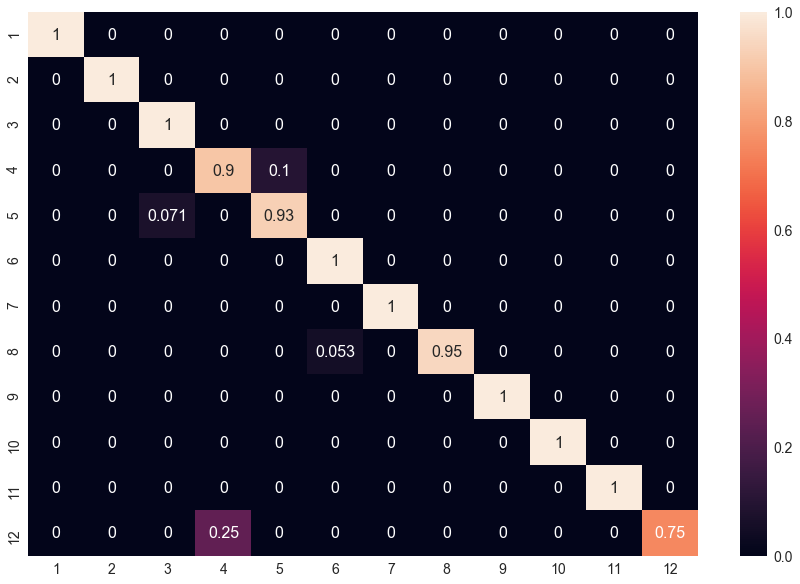

In [150]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import time

X,y = getXY(column=8,rps=50,activities=range(1,13),input_filenames=["mHealth_subject1.log"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=7)
# from imblearn.over_sampling import RandomOverSampler
# rus = RandomOverSampler()
# X_train_us, y_train_us = rus.fit_sample(X_train,y_train)
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
train_time = time.time()
start_time = time.time()
y_pred=knn.predict(X_test)
# y_pred=knn.predict(np.array(X_test[0]).reshape(1,-1))
pred_time = time.time()
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())
array = confusion_matrix(y_test, y_pred)


# min_max_scaler = preprocessing.MinMaxScaler()
# array_scaled = min_max_scaler.fit_transform(array)
# # df = pandas.DataFrame(array_scaled)
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]



df_cm = pd.DataFrame(array, range(1,13), range(1,13))
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4)#for label size
svm=sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
figure = svm.get_figure()
# figure.savefig('all_files.png', dpi=400)
print('Training time : ',train_time-start_time,'\nPrediction Time (per sample):', (pred_time-start_time)/len(y_pred))

# Looking for the results of other values of k

In [123]:
scores=[]
files = ["mHealth_subject3.log"]
X,y = getXY(column=8,rps=50,activities=range(0,12),input_filenames=files)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=7)

In [64]:
# from collections import Counter
# Counter(y_train)
# from imblearn.over_sampling import RandomOverSampler
# rus = RandomOverSampler()
# X_train_us, y_train_us = rus.fit_sample(X_train,y_train)
# Counter(y_train_us)

Counter({0.0: 1549,
         11.0: 1549,
         1.0: 1549,
         5.0: 1549,
         6.0: 1549,
         9.0: 1549,
         2.0: 1549,
         8.0: 1549,
         10.0: 1549,
         7.0: 1549,
         3.0: 1549,
         4.0: 1549})

In [112]:
scores=[]
for k in [x for x in range(25) if x%2 == 1]:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_us, y_train_us, cv=10, scoring='accuracy')
    scores+=[score.mean()]
    print(k,' ',score.mean())

1   0.9821917329981845
3   0.9747116324535678
5   0.9692235721267981
7   0.9647594609691386
9   0.9612630917469627
11   0.9580348415025834
13   0.9552363496718336
15   0.9532994693478566
17   0.9512554112554111
19   0.949695224130708
21   0.9489956011730205
23   0.9475967043708978


Text(0.5, 0, 'K')

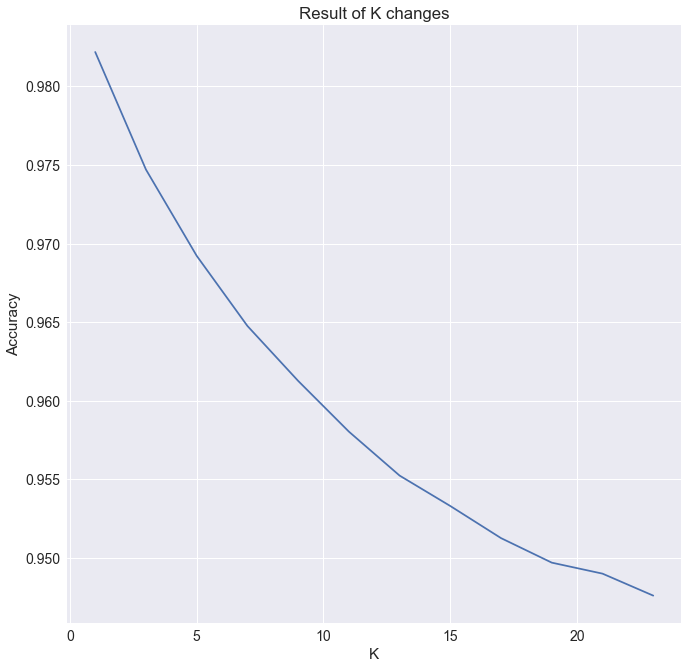

In [118]:
plt.figure(figsize=(11,11))
plt.plot([x for x in range(25) if x%2 == 1],scores)
plt.title("Result of K changes")
plt.ylabel("Accuracy")
plt.xlabel("K")

### K = 1 is the best

# Applying the model to all the subjects

In [127]:
scores=[]
from sklearn import model_selection
for file in["mHealth_subject1.log","mHealth_subject2.log","mHealth_subject3.log","mHealth_subject4.log","mHealth_subject5.log","mHealth_subject6.log","mHealth_subject7.log","mHealth_subject8.log","mHealth_subject9.log","mHealth_subject10.log"] :
    print(file)
    X,y = getXY(column=10,rps=50,activities=range(1,12),input_filenames=[file])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=7)
    knn = KNeighborsClassifier(n_neighbors=1)
    kfold = model_selection.KFold(n_splits=10, random_state=4)
    cv_results = model_selection.cross_val_score(knn, X, y, cv=kfold, scoring="accuracy")
    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores+=[score.mean()]

mHealth_subject1.log
mHealth_subject2.log
mHealth_subject3.log
mHealth_subject4.log
mHealth_subject5.log
mHealth_subject6.log
mHealth_subject7.log
mHealth_subject8.log
mHealth_subject9.log
mHealth_subject10.log


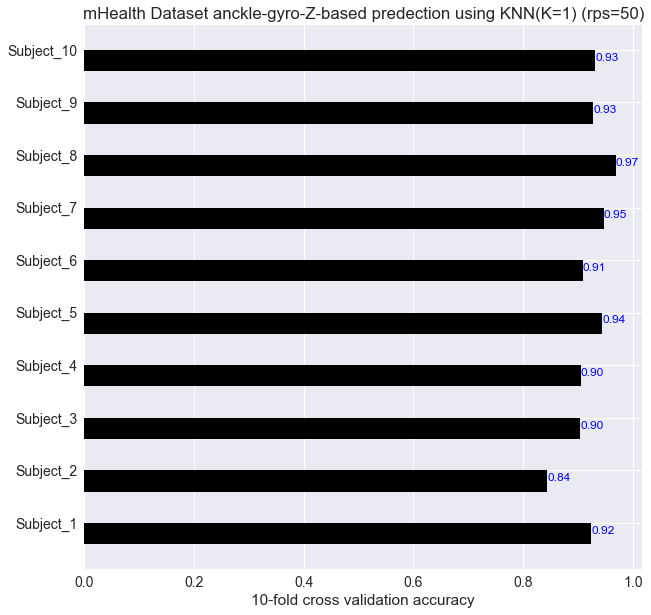

In [129]:
x = ["Subject_%d"%i for i in range(1,11)]
y = scores

# fig, ax = plt.subplots()  
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
width = 2 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ind = 5*ind
ax.barh(ind, y, width, color="black")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x)
plt.title('mHealth Dataset anckle-gyro-Z-based predection using KNN(K=1) (rps=50)')
plt.xlabel('10-fold cross validation accuracy')
for i, v in enumerate(y):
    ax.text(v, i*5, "%.2f"%(v), color='blue', fontsize=12)
#plt.show()

In [31]:
scores=[]
files = ["mHealth_subject1.log"]
X,y = getXY(column=9,rps=50,activities=range(1,12),input_filenames=files)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=7)